# Business-Oriented Diabetes Risk Classifier

## Predicting Type II Diabetes and Maximizing ROI with Machine Learning

This project builds a machine learning model to predict Type II diabetes using large-scale health survey data.  
Instead of optimizing only for accuracy, it introduces a business-driven approach by adjusting the classification threshold to **maximize Return on Investment (ROI)** — balancing intervention costs and benefits.  
Two models (Logistic Regression and Random Forest) are evaluated under this strategy, simulating a real-world healthcare decision-making scenario.

## Table of Contents

1. [Background](#1-background)  
2. [Dataset](#2-dataset)  
3. [Project Objective](#3-project-objective)  
4. [Business Assumptions & ROI Formula](#4-business-assumptions--roi-formula)  
5. [Data Preprocessing](#5-data-preprocessing)  
6. [Exploratory Data Analysis](#6-exploratory-data-analysis)  
7. [Model Training](#7-model-training)  
8. [Model Evaluation & Interpretation](#8-model-evaluation--interpretation)  
9. [ROI-Based Thresholding: Strategy, Trade-offs, and Reflection](#9-roi-based-thresholding-strategy-trade-offs-and-reflection)  
10. [Project Summary & Future Work](#10-project-summary--future-work)

## 1. Background

Type II diabetes is a growing public health concern, but many cases can be prevented or delayed through early intervention.  
Public health agencies and insurance companies often offer lifestyle coaching, checkups, or health monitoring to at-risk individuals.

However, such programs involve substantial costs.  
To use resources more efficiently, this project aims to build a model that can **identify high-risk individuals** and help decision-makers **maximize health outcomes while minimizing costs**.

## 2. Dataset

- **Source:** [Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)
- **Observations:** 253,680 individuals
- **Features:** 22 health and behavioral variables
- **Target Variable:** `Diabetes` (0 = No diabetes, 1 = Type II diabetes only)

> **Note:** Although this dataset was originally designed for predicting heart disease, it also includes diabetes indicators.  
> In this project, we repurpose the dataset to predict **Type II diabetes**, focusing on its strong correlation with lifestyle factors such as obesity, physical activity, and age.

## 3. Project Objective

This project has two core objectives:

1. **Predict Type II diabetes** using health and behavioral survey data, by building a classification model based on features such as BMI, age, and physical activity.

2. **Optimize the decision threshold** not only for classification performance, but to **maximize business ROI**, simulating a scenario where public health agencies or insurers invest in preventive care for high-risk individuals.

The key focus is to demonstrate how machine learning can support **cost-effective decision-making** in real-world healthcare settings.


## 4. Business Assumptions & ROI Formula

To align the model with real-world decision-making, we introduce a **business-oriented evaluation metric** — **Return on Investment (ROI)**.

This project simulates a scenario where a healthcare provider or insurer aims to **identify individuals at high risk of Type II diabetes** and offer early intervention programs.  
These interventions (e.g., lifestyle coaching, preventive medication, and regular checkups) are valuable when applied to **true positives (TP)**, but incur costs for **every individual predicted as positive** (both TP and FP).

---

### Assumptions

- **TP (True Positives):** Individuals who truly have diabetes and are correctly identified → generate business value (e.g., reduced long-term healthcare costs through early intervention)

- **FP (False Positives):** Individuals incorrectly identified as diabetic → **do not generate any benefit**, but still incur the cost of intervention

- **R (Revenue):** The estimated financial value (e.g., savings) generated per true positive through successful intervention

- **C (Cost):** The fixed cost of providing the intervention program to each individual predicted as positive (applied to both TP and FP)

---

### ROI Formula

$$
\text{ROI} = \frac{TP \times R - (TP + FP) \times C}{(TP + FP) \times C}
$$

This formula reflects the **net financial return relative to the intervention cost**, and allows the model to optimize predictions not just for accuracy, but for **real-world economic impact**.

---

### Parameter Estimation

To make the ROI formula operational, we assign estimated values based on published healthcare data:

- **R = \$15,500**  
  Estimated **annual direct medical cost** per diabetes patient in the U.S., representing the potential savings from successful intervention.

- **C = \$8,979.60**  
  Estimated **average cost per person** for delivering preventive care, including program administration, coaching, monitoring, and potential medication.

These values are sourced from publicly available healthcare cost reports. They are used to **simulate a realistic cost-benefit scenario**, rather than to provide exact financial projections.

## 5.Data Preprocessing

### 5.1 Load and View Raw Data


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv


📄 The dataset is located at:  
`/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv`

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")
df.shape
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### 5.2 Dataset Info and Missing Values

Inspected data structure and checked for missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing values found. All 22 columns are fully populated.

### 5.3 Target Variable Cleaning: Diabetes

The original `Diabetes` column contains both Type I and Type II diabetes.  
This project focuses only on **Type II diabetes**.  
Removed rows with Type I diabetes, and recoded the target variable into binary:
- `0` = No diabetes  
- `1` = Type II diabetes

In [5]:
print("Diabetes unique vales:", df["Diabetes"].unique())

Diabetes unique vales: [0. 2. 1.]


In [6]:
df = df[df["Diabetes"] != 1.0]

In [7]:
df["Diabetes"] = df["Diabetes"].replace(2.0, 1.0).astype(int)

### 5.4 Final Dataset Shape

Confirmed the final number of rows and columns after cleaning.

In [8]:
df.shape

(249049, 22)

Final dataset contains 249,049 rows and 22 columns.

### 5.5 Data Types and Encoding

Verified that all features are already numeric.  
No further encoding or transformation is needed at this stage.

In [9]:
df.dtypes.value_counts()

float64    21
int64       1
Name: count, dtype: int64

## 6.Exploratory Data Analysis

### 6.1 Target Variable Distribution
Plotted the distribution of the `Diabetes` variable to understand class imbalance.
Also calculated the base rate (positive rate) of diabetes.

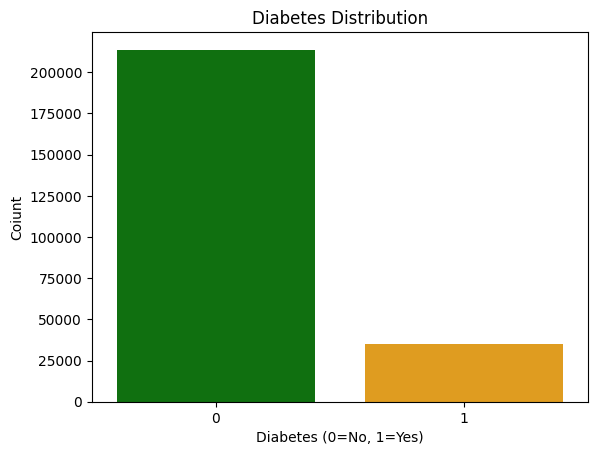

Base rate (positive rate) of Diabetes: 0.1419


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Diabetes", data=df, palette={0:"green",1:"orange"})
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Coiunt")
plt.show()

base_rate = df["Diabetes"].mean()
print(f"Base rate (positive rate) of Diabetes: {base_rate:.4f}")

**Observation:**
- There is significant class imbalance: ~14.2% of individuals have Type II diabetes.
- This imbalance may affect model performance and evaluation later.

### 6.2 Key Variables vs Diabetes

Explored the relationship between diabetes and several relevant features based on medical knowledge and common sense:
- Age and BMI (continuous risk factors)
- High blood pressure and smoking (lifestyle & health conditions)
- Physical activity and difficulty walking (mobility-related)
- History of heart disease (prior condition)

Visualized using boxplots (for continuous variables) and barplots (for categorical variables).

#### (1) Age vs Diabetes

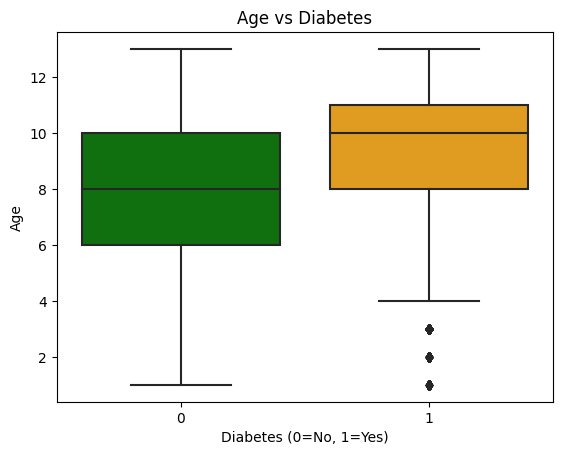

In [11]:
sns.boxplot(x="Diabetes", y="Age", data=df, palette={0: "green", 1: "orange"})
plt.title("Age vs Diabetes")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

**Observation:**  
Diabetic individuals tend to be older. The median age and overall age distribution are higher for those diagnosed with diabetes, supporting the well-known correlation between age and type II diabetes.

#### (2) BMI vs Diabetes

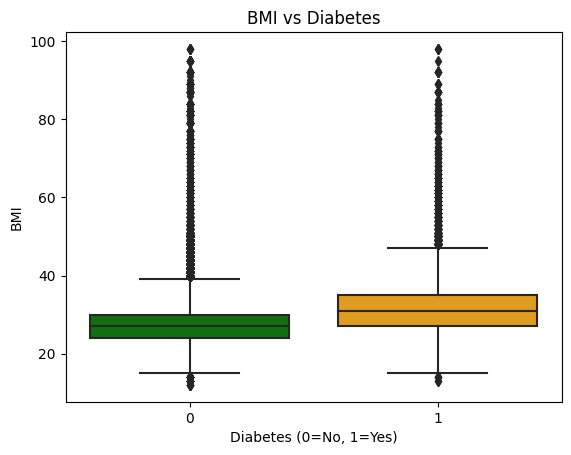

In [12]:
sns.boxplot(x="Diabetes", y="BMI", data=df, palette={0: "green", 1: "orange"})
plt.title("BMI vs Diabetes")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

**Observation:**  
People with diabetes generally have higher BMI. The boxplot shows a rightward shift in BMI values among diabetic individuals, suggesting that overweight and obesity are key risk factors for diabetes.

#### (3) High Blood Pressure vs Diabetes


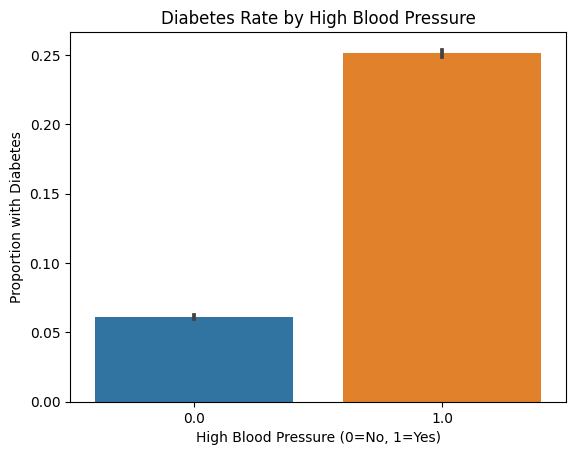

In [13]:
sns.barplot(x="HighBP", y="Diabetes", data=df)
plt.title("Diabetes Rate by High Blood Pressure")
plt.xlabel("High Blood Pressure (0=No, 1=Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()

**Observation:**  
The diabetes rate is significantly higher among individuals with high blood pressure (~ 25%) compared to those without (~ 6%). This suggests a strong association between hypertension and type II diabetes.

#### (4) Smoker vs Diabetes

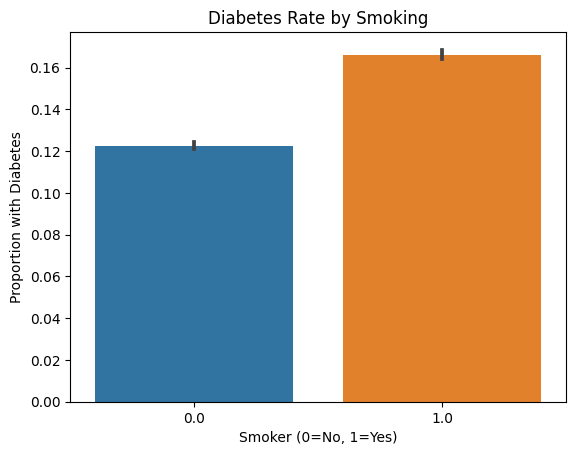

In [14]:
sns.barplot(x="Smoker", y="Diabetes", data=df)
plt.title("Diabetes Rate by Smoking")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()

**Observation:**  
Smokers have a moderately higher diabetes rate than non-smokers (around 16.5% vs 12.4%). While the difference is not as large as for other variables, it may still indicate a lifestyle risk factor.

#### (5) Physical Activity vs Diabetes

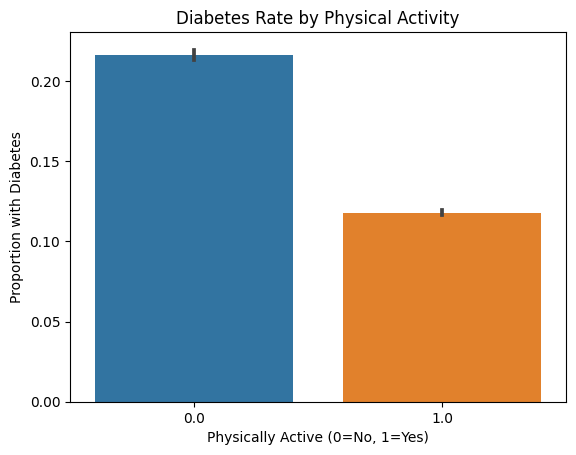

In [15]:
sns.barplot(x="PhysActivity", y="Diabetes", data=df)
plt.title("Diabetes Rate by Physical Activity")
plt.xlabel("Physically Active (0=No, 1=Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()

**Observation:**  
Individuals who are physically inactive have a noticeably higher diabetes rate (~ 22%) compared to those who exercise (~ 12%). This suggests that regular physical activity may reduce the risk of developing diabetes.

#### (6) Difficulty Walking vs Diabetes


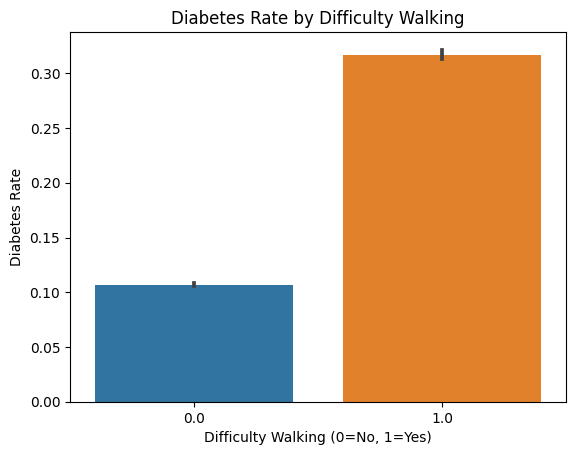

In [16]:
sns.barplot(x="DiffWalk", y="Diabetes", data=df)
plt.title("Diabetes Rate by Difficulty Walking")
plt.xlabel("Difficulty Walking (0=No, 1=Yes)")
plt.ylabel("Diabetes Rate")
plt.show()

**Observation:**  
Individuals who report difficulty walking have a much higher diabetes rate (~ 32%) than those who don’t (~ 11%). This may reflect underlying health issues or mobility-related risks associated with diabetes.

#### (7) Heart Disease or Attack vs Diabetes

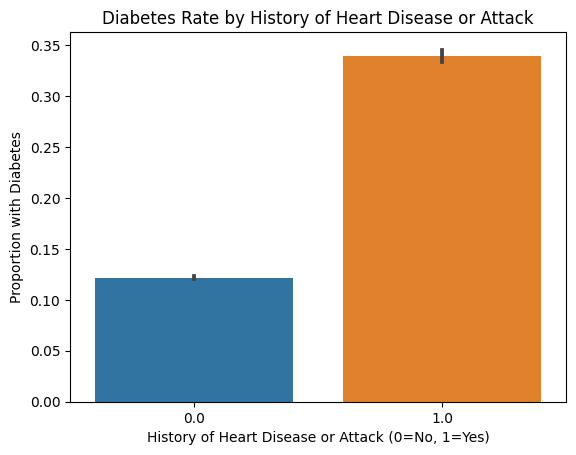

In [17]:
sns.barplot(x="HeartDiseaseorAttack", y="Diabetes", data=df)
plt.title("Diabetes Rate by History of Heart Disease or Attack")
plt.xlabel("History of Heart Disease or Attack (0=No, 1=Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()

**Observation:**  
A strong relationship exists between diabetes and heart disease: individuals with a history of heart disease or heart attack have a diabetes rate of over 34%, compared to only ~ 12% for those without such a history.

### 6.3 Correlation Heatmap

Generated a correlation heatmap to understand relationships between all features and detect potential multicollinearity.

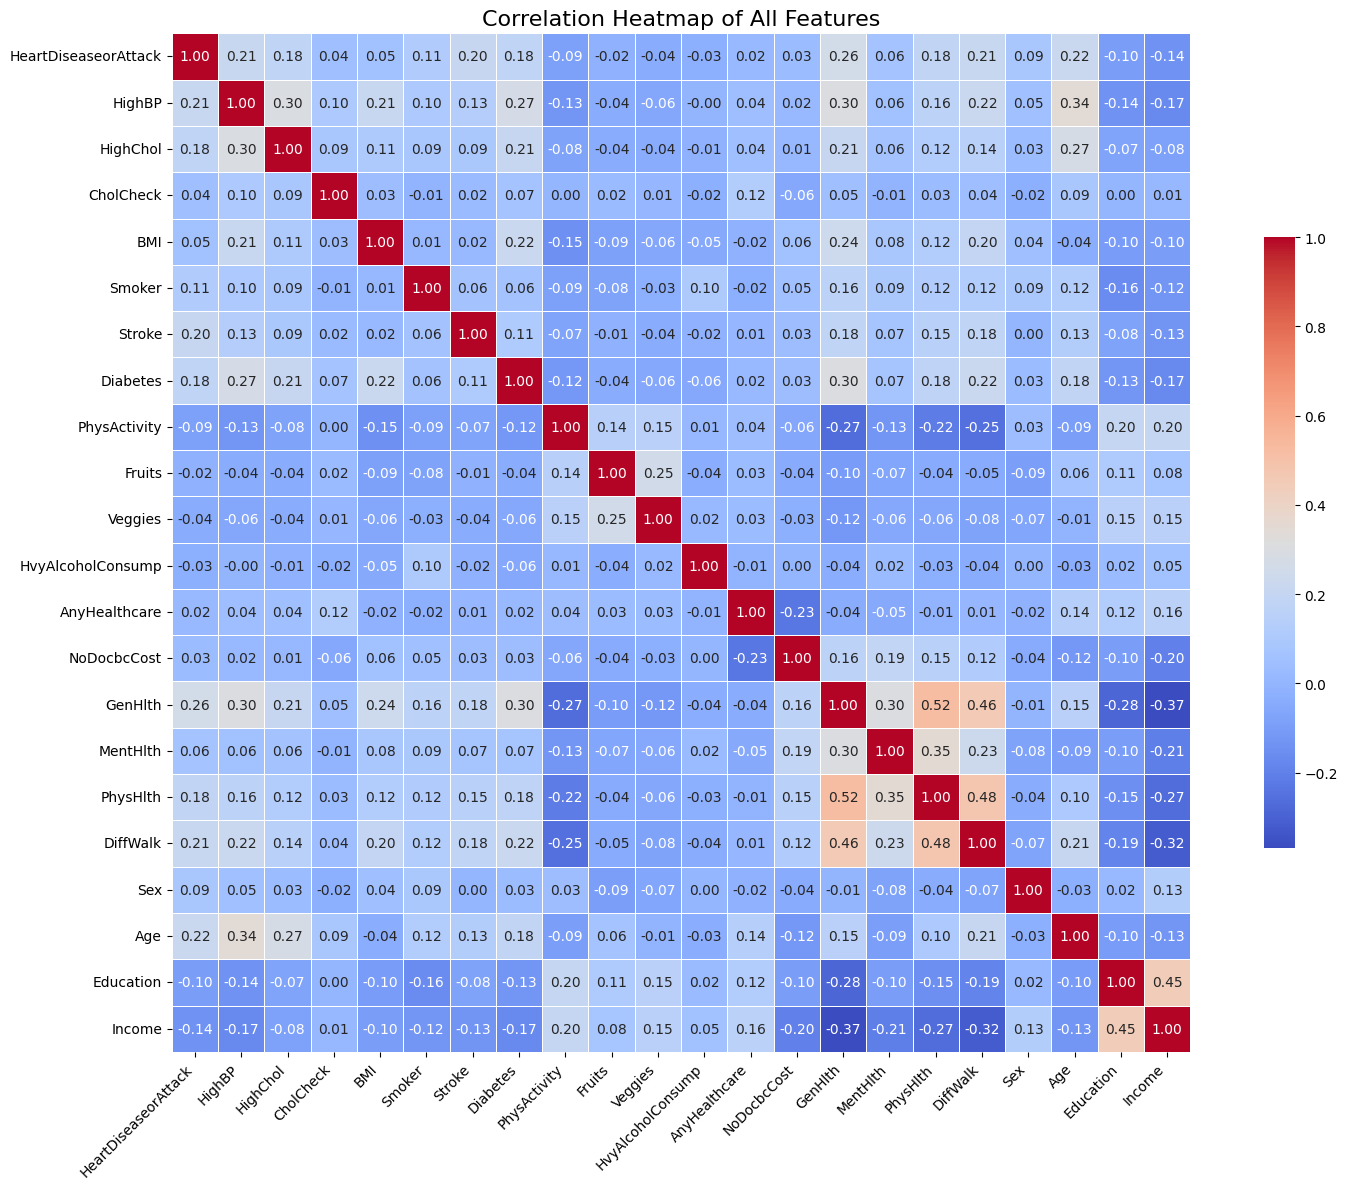

In [18]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            cmap="coolwarm", 
            annot=True, 
            fmt=".2f", 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.6},)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation:**  

The correlation analysis reveals the following key relationships between `Diabetes` and other variables:

***Top Positive Correlations:***
- `GenHlth` (r = 0.30): Individuals with worse general health are more likely to have diabetes.
- `HighBP` (r = 0.27): People with high blood pressure are more likely to be diabetic.
- `DiffWalk` (r = 0.22): Difficulty walking is associated with higher diabetes prevalence.
- `BMI` (r = 0.22): Higher BMI is positively associated with diabetes, consistent with known risk factors.
- `HighChol` (r = 0.21): High cholesterol is moderately linked with diabetes.
- `Age` (r = 0.18): Older age groups show higher rates of diabetes.
- `HeartDiseaseorAttack` (r = 0.18): There is a noticeable link between heart disease history and diabetes.

***Top Negative Correlations:***
- `Income` (r = -0.17): Lower-income individuals show higher diabetes rates.
- `Education` (r = -0.13): Lower education levels are associated with higher risk.
- `PhysActivity` (r = -0.12): Physically active people are less likely to have diabetes.
- `Veggies`, `HvyAlcoholConsump`, and `Fruits` also show slight negative correlations.

Overall, the correlations are consistent with medical and public health findings. While none of the correlations are extremely high, several features (especially general health, blood pressure, BMI, and income) stand out as potentially useful predictors in the modeling stage.

### 6.4 Feature Strategy Before Modeling

All 21 available features (excluding the target `Diabetes`) were retained for model training.

While some variables showed only weak correlations with the target, the full feature set was preserved for the following reasons:

- **Interpretability**: Many features have real-world meaning (e.g., smoking, physical activity, income) and could offer insight into diabetes risk when used in modeling.
- **Additive effects**: Weakly correlated features might still improve performance in combination with others.
- **Model flexibility**: Logistic Regression handles irrelevant features gracefully; Random Forest can naturally identify feature importance.
- **No multicollinearity concerns**: Correlation heatmap did not reveal strong collinearity between predictors.

This approach ensures no potentially valuable predictors are prematurely excluded before model training and evaluation.

## 7. Model Training

The objective of this project is to build a classification model that can accurately identify individuals at risk of Type II diabetes using health indicators and demographic information.

Since this is a binary classification task (`Diabetes` = 0 or 1), I selected two models with complementary strengths:

- **Logistic Regression**
  - A linear and interpretable model.
  - Useful as a baseline.
  - Helps understand how each feature contributes to diabetes likelihood.

- **Random Forest Classifier**
  - A non-linear ensemble model based on decision trees.
  - Captures complex relationships and feature interactions.
  - Typically delivers higher predictive accuracy, especially on large datasets.

In addition to standard classification metrics (accuracy, precision, recall, F1), I optimized the prediction threshold for each model based on a **business-driven ROI function**.  
This allows the models to prioritize outcomes that align with real-world cost-benefit considerations.

### 7.1 Logistic Regression

This section documents the full training and evaluation pipeline for the logistic regression model, including threshold optimization using the ROI metric defined earlier.

#### 7.1.1 Train-Test Split

To evaluate model performance on unseen data, I split the dataset into a training set (80%) and a test set (20%). Stratified sampling was used to maintain the proportion of diabetic cases in both sets.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train positive rate:", round(y_train.mean(), 4))
print("Test positive rate:", round(y_test.mean(), 4))

Train positive rate: 0.1419
Test positive rate: 0.1419


#### 7.1.2 Model Training

Trained a logistic regression model using scikit-learn.  
Also experimented with `class_weight='balanced'` for imbalanced data, but proceeded with the default model here.

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### 7.1.3 Initial Evaluation (Default Threshold = 0.5)

Evaluated the model using the default threshold of 0.5.  
Metrics include confusion matrix, precision, recall, F1-score, and AUC.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("AUC Score:", roc_auc_score(y_test, y_prob_lr))

Confusion Matrix:
[[41694  1047]
 [ 5830  1239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     42741
           1       0.54      0.18      0.26      7069

    accuracy                           0.86     49810
   macro avg       0.71      0.58      0.59     49810
weighted avg       0.83      0.86      0.83     49810

AUC Score: 0.8280216795919828


#### 7.1.4 Threshold Optimization Based on ROI

To align model predictions with business value, I optimized the classification threshold to maximize ROI, rather than using the default 0.5.

ROI is calculated using the formula:

$$
ROI = \frac{TP \cdot R - (TP + FP) \cdot C}{(TP + FP) \cdot C}
$$

Where:
- **TP** = True Positives
- **FP** = False Positives
- **R** = Revenue per TP (savings per correctly identified case)
- **C** = Cost per intervention (applied to all positive predictions)

Thresholds between 0.01 and 0.98 were tested to identify the optimal ROI.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roi(y_true, y_prob, threshold, R, C):
    y_pred = (y_prob >= threshold).astype(int)
    TP = ((y_pred == 1) & (y_true == 1)).sum()
    FP = ((y_pred == 1) & (y_true == 0)).sum()
    
    if (TP + FP) == 0:
        return -1 
    revenue = TP * R
    cost = (TP + FP) * C
    roi = (revenue - cost) / cost
    return roi

R = 15500    
C = 8979.60

thresholds = np.arange(0.01, 0.99, 0.01)
rois = [calculate_roi(y_test, y_prob_lr, t, R, C) for t in thresholds]

best_roi = max(rois)
best_threshold = thresholds[np.argmax(rois)]

print(f"Best Threshold by ROI: {best_threshold:.3f}")
print(f"Best ROI: {best_roi:.4f}")

Best Threshold by ROI: 0.750
Best ROI: 0.1328


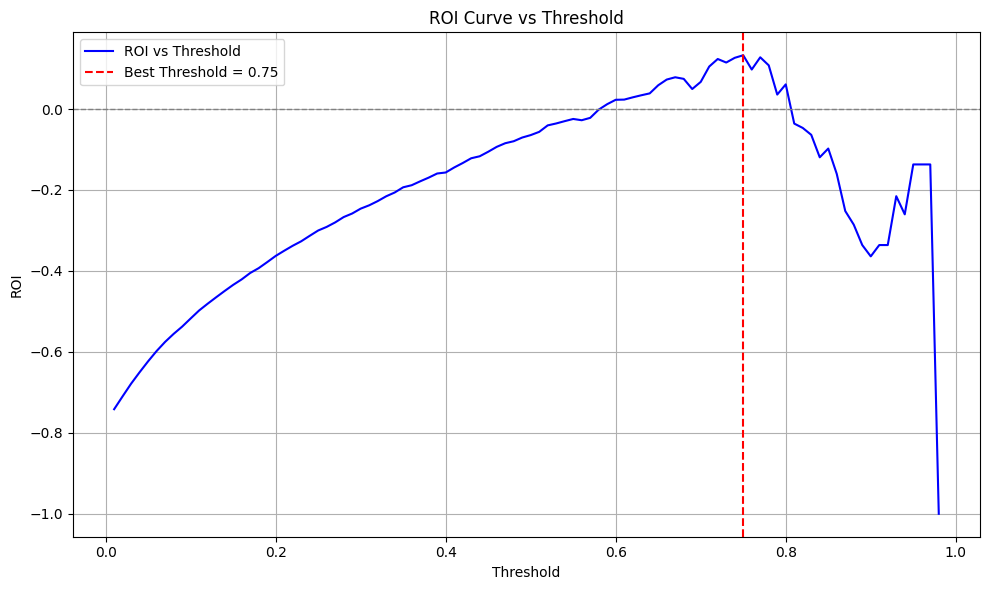

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rois, label="ROI vs Threshold", color="blue")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Threshold = {best_threshold:.2f}")
plt.axhline(0, color="gray", linestyle="dashed", linewidth=1)
plt.xlabel("Threshold")
plt.ylabel("ROI")
plt.title("ROI Curve vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 7.1.5 Final Evaluation with Optimized Threshold

Using the optimized threshold (≈ 0.75), I re-evaluated the model.  
This threshold balances business value: maximizing true positives while controlling the cost of false positives.

In [24]:
y_pred_opt = (y_prob_lr >= best_threshold).astype(int)

print("Confusion Matrix (Threshold = {:.2f}):".format(best_threshold))
print(confusion_matrix(y_test, y_pred_opt))

print("\nClassification Report (Threshold = {:.2f}):".format(best_threshold))
print(classification_report(y_test, y_pred_opt))
print("AUC Score:", roc_auc_score(y_test, y_prob_lr))

Confusion Matrix (Threshold = 0.75):
[[42675    66]
 [ 6943   126]]

Classification Report (Threshold = 0.75):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     42741
           1       0.66      0.02      0.03      7069

    accuracy                           0.86     49810
   macro avg       0.76      0.51      0.48     49810
weighted avg       0.83      0.86      0.80     49810

AUC Score: 0.8280216795919828


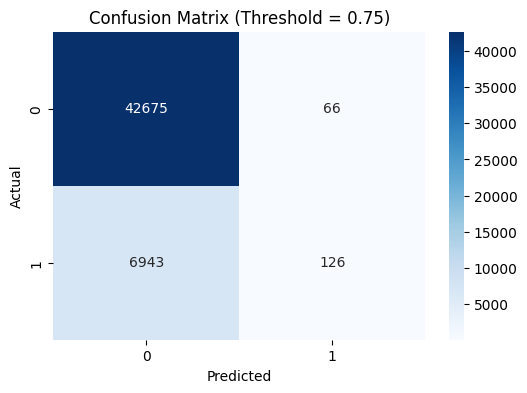

In [25]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {best_threshold:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 7.2 Random Forest Classifier

This section documents the full training and evaluation pipeline for the random forest model, including threshold optimization using the ROI metric defined earlier.

#### 7.2.1 Model Training

Trained a Random Forest classifier as a non-linear alternative to Logistic Regression.  
This model can capture feature interactions and non-linear relationships, and often performs well on structured datasets.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#### 7.2.2 Initial Evaluation (Threshold = 0.5)

Evaluated model using the default classification threshold of 0.5.  
Computed confusion matrix, classification report, and AUC.

In [27]:
y_pred_rf = (y_prob_rf >= 0.5).astype(int)

print("Confusion Matrix (Threshold = 0.5):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred_rf))

print("AUC Score:", roc_auc_score(y_test, y_prob_rf))

Confusion Matrix (Threshold = 0.5):
[[41328  1413]
 [ 5632  1437]]

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     42741
           1       0.50      0.20      0.29      7069

    accuracy                           0.86     49810
   macro avg       0.69      0.59      0.61     49810
weighted avg       0.83      0.86      0.83     49810

AUC Score: 0.8058043035296848


#### 7.2.3 Threshold Optimization Based on ROI

To align the model predictions with real-world business objectives, I optimized the classification threshold to maximize ROI using the same formula defined earlier.

I first reused the full threshold range from 0.01 to 0.98 (step = 0.01), and evaluated ROI at each point.

In [28]:
rois_rf = [calculate_roi(y_test, y_prob_rf, t, R, C) for t in thresholds]

best_roi_rf = max(rois_rf)
best_threshold_rf = thresholds[np.argmax(rois_rf)]

print(f"Best Threshold by ROI: {best_threshold_rf:.3f}")
print(f"Best ROI: {best_roi_rf:.4f}")

Best Threshold by ROI: 0.950
Best ROI: 0.7261


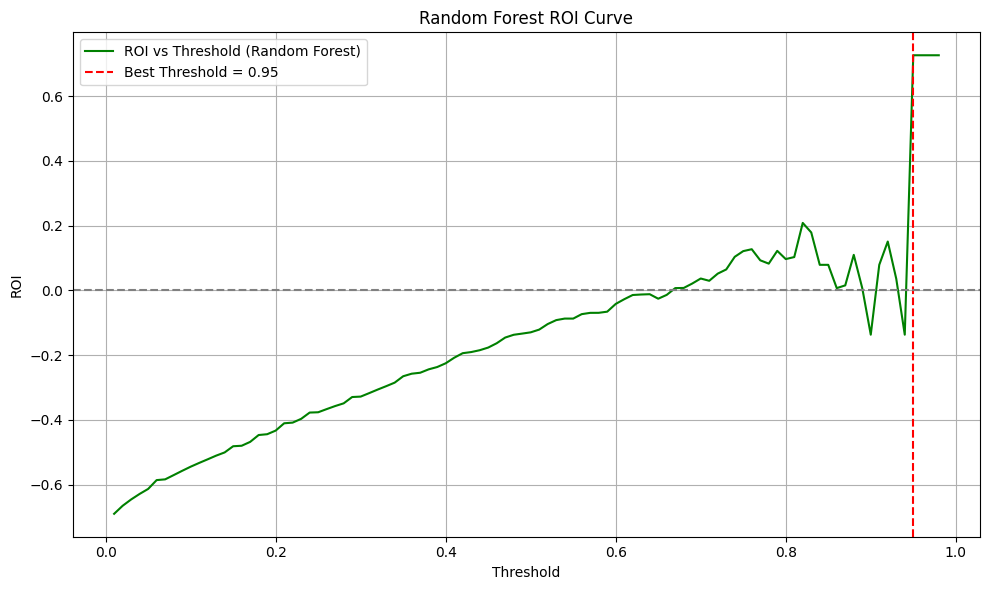

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rois_rf, label="ROI vs Threshold (Random Forest)", color="green")
plt.axvline(best_threshold_rf, color="red", linestyle="--", label=f"Best Threshold = {best_threshold_rf:.2f}")
plt.axhline(0, color="gray", linestyle="dashed")
plt.xlabel("Threshold")
plt.ylabel("ROI")
plt.title("Random Forest ROI Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Upon inspecting the curve and the predicted results at this threshold:

In [30]:
y_pred_rf_opt = (y_prob_rf >= best_threshold_rf).astype(int)
cm = confusion_matrix(y_test, y_pred_rf_opt)
tn, fp, fn, tp = cm.ravel()

print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")

TP: 1, FP: 0, TN: 42741, FN: 7068


Although the ROI was numerically highest at a threshold of 0.95,  
this result proved misleading: the model predicted only one diabetic case (TP = 1), and missed all others (FN = 7068).

This is an example of extreme over-conservatism — the model avoided false positives entirely by sacrificing true positives,  
which undermines the purpose of early detection and intervention.

Despite the high ROI score, this threshold is not suitable for real-world application.  
I therefore decided to constrain the threshold range in the next step to encourage more realistic predictions.

#### 7.2.4 ROI Optimization with Adjusted Threshold (≤ 0.80)

To avoid the extreme underprediction caused by the previously selected high threshold (0.95),  
I restricted the maximum threshold to **0.80** and re-ran the ROI optimization.

This adjustment encourages the model to make more positive predictions, resulting in a more balanced trade-off between recall and cost.

In [31]:
thresholds_rf_limited = np.arange(0.01, 0.81, 0.01)

rois_rf_limited = [calculate_roi(y_test, y_prob_rf, t, R, C) for t in thresholds_rf_limited]

best_roi_rf_limited = max(rois_rf_limited)
best_threshold_rf_limited = thresholds_rf_limited[np.argmax(rois_rf_limited)]

print(f"Adjusted Best Threshold (≤ 0.80): {best_threshold_rf_limited:.3f}")
print(f"Adjusted Best ROI: {best_roi_rf_limited:.4f}")

Adjusted Best Threshold (≤ 0.80): 0.760
Adjusted Best ROI: 0.1271


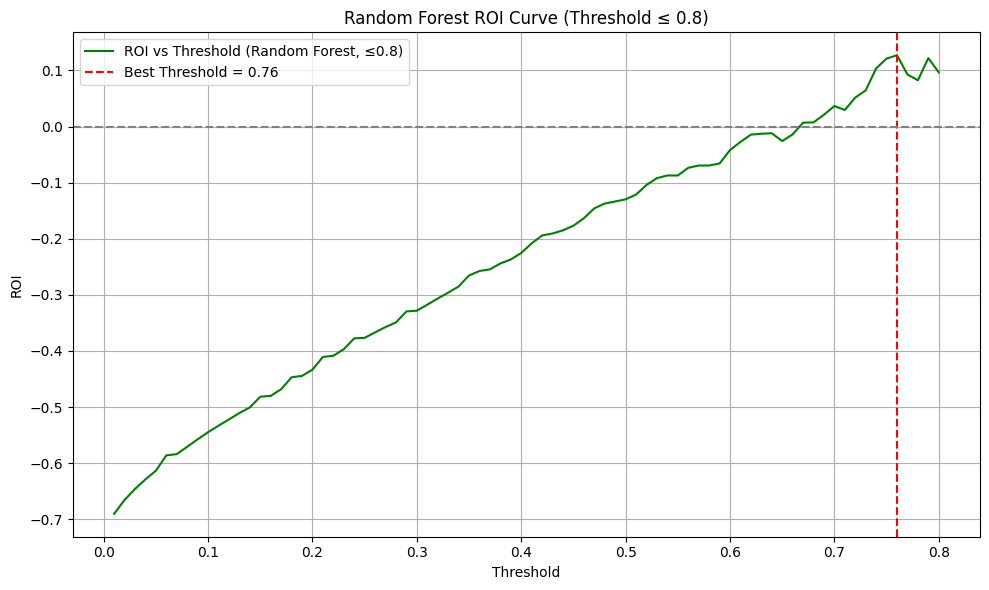

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds_rf_limited, rois_rf_limited, label="ROI vs Threshold (Random Forest, ≤0.8)", color="green")
plt.axvline(best_threshold_rf_limited, color="red", linestyle="--", label=f"Best Threshold = {best_threshold_rf_limited:.2f}")
plt.axhline(0, color="gray", linestyle="dashed")
plt.xlabel("Threshold")
plt.ylabel("ROI")
plt.title("Random Forest ROI Curve (Threshold ≤ 0.8)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The adjusted threshold (~0.76) yielded a more realistic and practical prediction behavior.  
The model now identifies a more reasonable number of true positive cases while keeping false positives under control.

This demonstrates the importance of combining **metric optimization with model behavior inspection**.  
A seemingly optimal metric like ROI can produce unbalanced or even misleading results without sanity checks.

#### 7.2.5 Final Evaluation with Adjusted Threshold

Using the optimized threshold (**≈ 0.76**) from the adjusted ROI search,  
I re-evaluated the Random Forest model’s performance on the test set.

This evaluation includes the confusion matrix, classification metrics, AUC score, and a heatmap visualization.

In [33]:
y_pred_rf_final = (y_prob_rf >= best_threshold_rf_limited).astype(int)

print(f"Confusion Matrix (Threshold = {best_threshold_rf_limited:.2f}):")
print(confusion_matrix(y_test, y_pred_rf_final))

print(f"\nClassification Report (Threshold = {best_threshold_rf_limited:.2f}):")
print(classification_report(y_test, y_pred_rf_final))

print("AUC Score:", roc_auc_score(y_test, y_prob_rf))

Confusion Matrix (Threshold = 0.76):
[[42682    59]
 [ 6958   111]]

Classification Report (Threshold = 0.76):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     42741
           1       0.65      0.02      0.03      7069

    accuracy                           0.86     49810
   macro avg       0.76      0.51      0.48     49810
weighted avg       0.83      0.86      0.80     49810

AUC Score: 0.8058043035296848


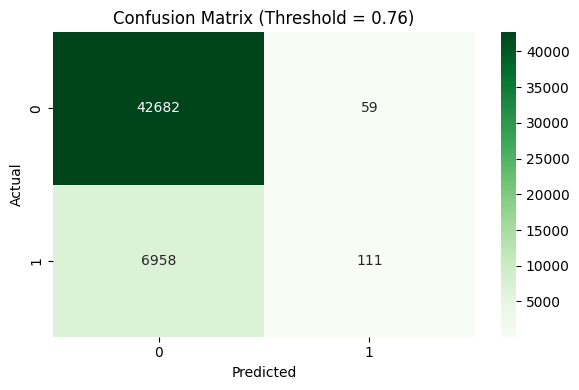

In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (Threshold = {best_threshold_rf_limited:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### 8. Model Evaluation & Interpretation

In this section, I compare the performance of the two models — **Logistic Regression** and **Random Forest** — using classification metrics and business-driven ROI results.

The evaluation is based on:

- **Confusion Matrix**
- **Precision / Recall / F1-Score**
- **AUC Score**
- **ROI at optimized threshold**

This comparison helps identify which model performs better under the business assumption that early intervention brings value only for true diabetic cases.

#### 8.1 Performance Summary Table

| Metric             | Logistic Regression | Random Forest |
|--------------------|---------------------|----------------|
| Best Threshold     | 0.75                | 0.76           |
| Accuracy           | 0.86                 | 0.86            |
| Precision (1)      | 0.66                 | 0.65            |
| Recall (1)         | 0.02                 | 0.02            |
| F1-score (1)       | 0.03                 | 0.03            |
| AUC Score          | 0.8280               | 0.8058         |
| ROI                | 0.1328              | 0.1271         |

Note: Class `1` refers to individuals with diabetes.

### 8.2 Confusion Matrices (Final Thresholds)

 **Logistic Regression (Threshold = 0.75)**  
|              | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| Actual 0     | 42675       | 66          |
| Actual 1     | 6943        | 126         |

**Random Forest (Threshold = 0.76)**  
|              | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| Actual 0     | 42682       | 59          |
| Actual 1     | 6958        | 111         |

These results confirm that both models are **conservative in predicting diabetes (Class 1)**, prioritizing **precision and cost-effectiveness** over recall. This behavior aligns with business-driven healthcare strategies that aim to minimize unnecessary interventions.

### 8.3 Interpretation & Insights
- Both models achieved **high accuracy (~86%)** and **reasonable AUC scores** (Logistic: 0.828, RF: 0.806).
- **Precision (1)** is around **0.66**, while **recall is very low (~0.02)** for both models.

This pattern reflects the **threshold optimization based on ROI**:

- ROI favors **true positives** (TP) and penalizes **false positives** (FP), pushing the model to be cautious.
- As a result, only a **small number of individuals are flagged** as diabetic — reducing cost and maximizing financial return, but **sacrificing recall**.
  
**Why Logistic Regression performed slightly better:**
- It is simpler and more robust under class imbalance.
- Random Forest initially appeared to perform well due to an **extremely high threshold (0.95)**, which led to **overfitting** and unrealistic ROI.
- After limiting the threshold (≤ 0.8), Random Forest became more reasonable, but **still slightly underperformed** compared to Logistic Regression.

**Overall takeaway**:  
- Both models adopt the same strategy under ROI optimization — **prioritize confident predictions** to reduce cost, even if **many true diabetic cases are missed**.
- This cost-sensitive trade-off is intentional and aligned with ROI optimization rather than fairness or sensitivity.” 

## 9. ROI-Based Thresholding: Strategy, Trade-offs, and Reflection

The results show that both models achieved **high accuracy (~86%)** and **reasonably strong AUC scores** (Logistic: 0.828, RF: 0.806).  
**Precision for predicting diabetes (class 1)** was around **0.66**, while **recall remained low (~0.02)**.

This outcome reflects the deliberate use of a **business-driven thresholding strategy**, where the goal was not to maximize classification metrics, but rather **financial ROI**.

---

### ROI-Based Threshold Strategy

Instead of optimizing for metrics like accuracy or F1-score, I selected the threshold that **maximized ROI**, defined as:

$$
\text{ROI} = \frac{\text{TP} \times R - (\text{TP} + \text{FP}) \times C}{(\text{TP} + \text{FP}) \times C}
$$

Where:
- **TP** = True Positives (correctly predicted diabetics)
- **FP** = False Positives (incorrectly predicted diabetics)
- **R** = Revenue from identifying one true positive
- **C** = Cost of intervention per identified individual

This strategy:
- Encourages **positive predictions only when confidence is high**
- **Minimizes false positives (FP)** and improves **precision**
- Reduces intervention cost while maintaining financial return

**Result**: Both models only predicted diabetes in a small portion of individuals — yielding **high ROI despite low recall**.

Logistic Regression slightly outperformed Random Forest, likely due to:
- **Simplicity** and **stability** under data imbalance
- **Better alignment with the ROI objective**

---

**Reflection: What If We Maximized Profit Instead?**

While this project focused on maximizing ROI — the relative return per intervention — an alternative objective would be to maximize **absolute profit**. 

This would involve selecting the threshold that yields the greatest total financial gain:

$$
\text{Profit} = (\text{TP} \times R) - ((\text{TP} + \text{FP}) \times C)
$$

In theory, profit-maximizing thresholds tend to be **lower** than ROI-maximizing ones, as they allow the model to identify more true positives, even at the expense of higher false positives.

However, in early testing:

- The profit-max threshold resulted in significantly lower recall and F1-score
- Overall profit was **not higher** than ROI-max threshold
- The model’s AUC was insufficient to support aggressive threshold lowering

**Takeaway:**  
Given the model quality and cost structure, ROI maximization provided a more reliable and practical thresholding strategy.

### Reflection: Why I Didn't Pursue Profit-Max Modeling

In addition to ROI-based threshold selection, I initially considered optimizing thresholds based on **total profit**. However, during early tests:

- The **profit-max threshold** resulted in lower recall and significantly lower F1-score
- The overall **profit was lower** than with ROI-max strategy
- The model AUC was too low to support reliable predictions at lower thresholds

This suggests that, under the current model performance and business cost structure, maximizing **ROI** remains a more practical and robust approach.

> Takeaway: It's important to align optimization goals not only with theory, but also with **model quality and real-world feasibility**.

## 10. Project Summary & Future Work

### Summary

This project developed a predictive model for Type 2 diabetes using health and demographic data.  
The main innovation was the incorporation of a **business-oriented optimization metric** — ROI — which guided both model evaluation and threshold selection.

**Key Outcomes:**
- Used a real-world dataset with 240K+ samples and 22 features
- Performed thorough EDA to identify diabetes risk factors
- Built two models (Logistic Regression & Random Forest)
- Created a custom ROI metric to evaluate cost-effective predictions
- Tuned thresholds for maximum ROI, not accuracy
- Logistic Regression achieved the best performance (ROI = 0.1328)

### Business Relevance

This modeling strategy simulates a healthcare scenario where early detection of high-risk individuals can lead to **preventive intervention** — generating both **health benefits** and **financial value**.

**Key Insight:**  
By aligning prediction thresholds with ROI, the model minimizes unnecessary costs while maximizing strategic impact.

---

### Future Work

There are several ways this project could be expanded or improved:

- **Model Improvement**: Explore more advanced models (e.g., XGBoost, LightGBM) and feature engineering to improve recall and AUC.
- **Cost-Benefit Sensitivity**: Test alternative cost/revenue assumptions to simulate different real-world scenarios.
- **Class Imbalance Handling**: Try resampling techniques (SMOTE, class weights) or loss function modifications to improve minority class detection.
- **Model Deployment**: Integrate with dashboards or APIs to support real-time decision-making in a business setting.
- **Long-Term Impact Modeling**: Consider the long-term cost savings or patient lifetime value when evaluating model ROI or profit.

---

### Final Thoughts

> Machine learning is not just about prediction — it’s about making smarter, data-driven decisions that align with business goals.